In [1]:
#получение двух файлов с данными(на русском и английском) из текстового корпуса
import xml.etree.ElementTree as ET
tree = ET.parse('en-ru(1).xml')
root = tree.getroot()
f = open('text2.txt', 'w')

In [2]:
for child in root:
    for subchild in child.iter('seg'):
        f.write (subchild.text)
        f.write('\n')
f.close()

In [3]:
file = open('text2.txt', 'r')
file_en = open('text2_en.txt', 'w')
file_ru = open('text2_ru.txt', 'w')
line = file.readline()
i = 0
while line:
    if i%2 == 0:
        file_en.write(line)
        file_en.write('\n')
    else:
        file_ru.write(line)
        file_ru.write('\n')
    line = file.readline()
    i = i+1
file.close()
file_en.close()
file_ru.close()

In [ ]:
#далее при помощи библиотеки fasttext получаем векторное представление предложений, делаем следующие действия:
#0. Обучаем модель: ./
#1. cd fastText
#2. ./fasttext print-sentence-vectors model.bin < text_test_en > output2_en - 
# выводим в output2_en вектора для предложений из text_test_en на основе заранее тренированной модели model.bin 

In [2]:
#получаем лист из векторов для русских слов
import numpy as np
import re
import json
f = open("output2_ru", "r")   
rus = np.loadtxt(f, dtype=np.float)
print(rus)    
print (rus.shape)

[[-0.058817  0.065694 -0.069966 ...,  0.13624  -0.1546   -0.085428]
 [ 0.        0.        0.       ...,  0.        0.        0.      ]
 [-0.12101  -0.039981 -0.049526 ...,  0.11853  -0.17444  -0.050421]
 ..., 
 [ 0.        0.        0.       ...,  0.        0.        0.      ]
 [-0.096215 -0.04697  -0.067605 ...,  0.05636  -0.11189  -0.057439]
 [ 0.        0.        0.       ...,  0.        0.        0.      ]]
(34510, 100)


In [3]:
#для английских слов
import re
import json
import numpy as np
f = open("output2_en", "r")
en = np.loadtxt(f, dtype=np.float)
print (en)
print(en.shape)

[[ 0.1167     -0.064719   -0.00024873 ...,  0.12594     0.024676   -0.051659  ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.069616    0.093813   -0.046783   ...,  0.13331    -0.036445   -0.090356  ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.093333    0.00094978 -0.012536   ...,  0.048184   -0.01475    -0.021936  ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
(34510, 100)


In [30]:
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
x_train, x_test, y_train, y_test = train_test_split(rus, en, test_size=0.33, random_state=42)
model = Sequential()
model.add(Dense(32, input_dim=100, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(100, activation='tanh'))
model.compile(loss="mse", optimizer="rmsprop")
filepath = "/home/ekaterina/documents/Python/weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience = 3, verbose = 2)
callbacks_list = [checkpoint, earlystop]
history = model.fit(x_train, y_train, validation_split=0.2, epochs=15 ,batch_size=10, callbacks = callbacks_list,verbose=2)
predictions = model.predict(x_test)


Train on 18496 samples, validate on 4625 samples
Epoch 1/15
 - 3s - loss: 9.9984e-04 - val_loss: 3.7279e-04

Epoch 00001: val_loss improved from inf to 0.00037, saving model to /home/ekaterina/documents/Python/weights.hdf5
Epoch 2/15
 - 2s - loss: 3.5254e-04 - val_loss: 3.6175e-04

Epoch 00002: val_loss improved from 0.00037 to 0.00036, saving model to /home/ekaterina/documents/Python/weights.hdf5
Epoch 3/15
 - 2s - loss: 3.3309e-04 - val_loss: 3.5354e-04

Epoch 00003: val_loss improved from 0.00036 to 0.00035, saving model to /home/ekaterina/documents/Python/weights.hdf5
Epoch 4/15
 - 2s - loss: 3.2011e-04 - val_loss: 3.3423e-04

Epoch 00004: val_loss improved from 0.00035 to 0.00033, saving model to /home/ekaterina/documents/Python/weights.hdf5
Epoch 5/15
 - 2s - loss: 3.1052e-04 - val_loss: 3.2051e-04

Epoch 00005: val_loss improved from 0.00033 to 0.00032, saving model to /home/ekaterina/documents/Python/weights.hdf5
Epoch 6/15
 - 2s - loss: 3.0647e-04 - val_loss: 3.2210e-04

Epoch

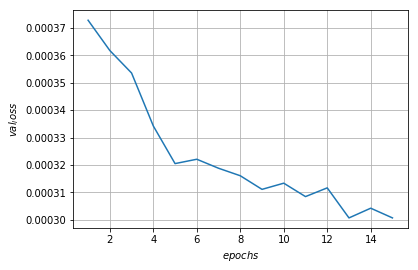

In [31]:
import matplotlib.pyplot as plt
x = np.arange(1, 16, 1)
y = np.array(history.history['val_loss'])
plt.plot(x,y)
plt.xlabel(r'$epochs$')
plt.ylabel(r'$val_loss$')
plt.grid(True)
plt.show()